## K-nearest neighbor in Python and practical considerations

In the lecture we have introduced a new machine learning technique, K-nearest neighbor. Here is a quick summary of its characteristics.

- KNN is a non-parametric and instance-based machine learning algorithm.
- It is primarily used for classification, although it can also be applied to regression problems.
- The algorithm determines the class or value of a new instance by examining the k closest labeled instances (neighbors) in the training set.
- The number of neighbors, k, is a hyperparameter that needs to be specified beforehand.
- The class/value of the new instance is determined by majority voting (for classification) or averaging (for regression) among the k neighbors.
- The distance metric, such as Euclidean, Manhattan, or Minkowski, is used to measure the similarity between instances and identify the nearest neighbors.
- The algorithm requires storing the entire training dataset in memory, which can be computationally expensive for large datasets.

In this code demostration, we will highlight a couple of things when you apply KNN to real life models, including:

- Fit and evaluate KNN performance.
- The choice of k and the distance metric.
- Data preprocessing and feature scaling.
- Other factors: imbalance data, computational efficiency, curse of dimensionality

#### Example 1: Iris dataset

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

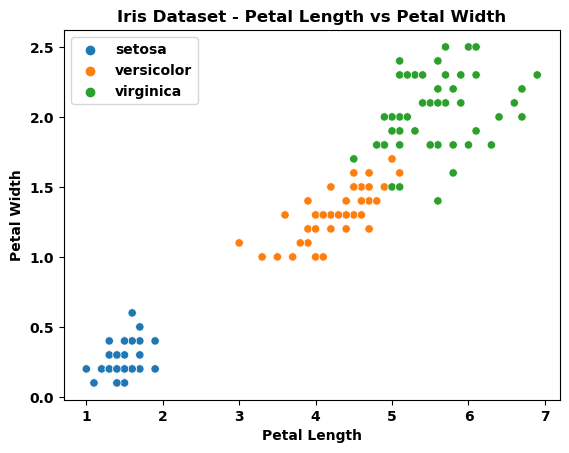

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
class_labels = [target_names[label] for label in y]

# Create a scatter plot using Seaborn
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=class_labels)

# Add labels and legends
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset - Petal Length vs Petal Width')

# Display the plot
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Extract the features (petal length and petal width)
X = iris.data[:, 2:4]
y = iris.target

# Fit KNN model
k = 1
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X, y)
y_pred = knn_model.predict(X)

# Calculate the accuracy of the classifier
print(accuracy_score(y, y_pred))


0.9866666666666667


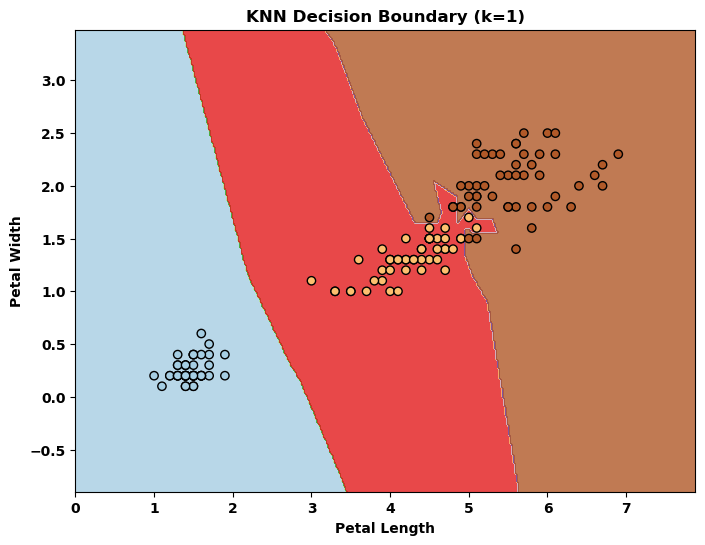

In [11]:
# Create a meshgrid of points to make predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the meshgrid
Z = knn_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KNN Decision Boundary (k={})'.format(k))
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

# Train the classifier on the training data
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
print(accuracy_score(y_pred, y_test))
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9666666666666667
0.9684210526315788
0.9666666666666667
0.9652652652652652


#### Example 2: Breast Cancer dataset

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=4400)

# Fit KNN model
k= 5
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the unscaled training data
knn_model.fit(X_train, y_train)
y_pred_unscaled = knn_model.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Scale the training and testing data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the classifier on the scaled training data
knn_model.fit(X_train_scaled, y_train)
y_pred_scaled = knn_model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print the accuracies
print(f"Accuracy without scaling training data: {accuracy_unscaled}")
print(f"Accuracy scaling training data: {accuracy_scaled}")

Accuracy without scaling training data: 0.9385964912280702
Accuracy scaling training data: 0.9736842105263158


#### Example 3: Breast Cancer data with parameter tuning

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21), 
               'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, param_grid, refit=True, cv=5, return_train_score=True)
knn_grid.fit(X_train_scaled, y_train)

# Get the best parameters and best score from the grid search
best_params = knn_grid.best_params_
print(best_params)

# Fit KNN model with the best parameters
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                metric=best_params['metric'])
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test_scaled)

# Calculate accuracy on the test set
print(accuracy_score(y_pred, y_test))

{'metric': 'manhattan', 'n_neighbors': 5}
0.956140350877193


#### Other factors may affect KNN

###### Imbalanced data

Imbalanced data can have a significant impact on the performance of the K-nearest neighbors (KNN) algorithm. Here are some effects of imbalanced data on KNN:

- Bias towards majority class: KNN tends to be biased towards the majority class in imbalanced datasets. Since KNN predicts the class based on the majority of the k nearest neighbors, in imbalanced data, the majority class is likely to dominate the neighborhood, leading to a bias in predictions. As a result, the minority class may be consistently misclassified or overlooked.

- Sensitivity to class distribution: The performance of KNN can be sensitive to the distribution of classes in imbalanced data. If the minority class is sparsely represented or contains fewer instances, the algorithm may struggle to find sufficient neighbors of the minority class, resulting in poor prediction accuracy for the minority class and suboptimal classification results for the minority class.

###### Time complexity

Most of the imbalance data are also pretty large, and large datasets are not sutiable for KNN sue to the computational complexity. The time complexity of the K-nearest neighbors (KNN) algorithm depends on various factors, including the sample size (number of instances), the number of features, and the choice of data structures for efficient neighbor search. Here's a breakdown of the time complexity for KNN with varying sample sizes:

- Training Phase: Time complexity: O(1)
The training phase of KNN involves only storing the training instances and their corresponding labels in memory. It does not involve any computational overhead, so the time complexity is considered constant, O(1).

- Prediction Phase: Time complexity: O(n * m * d)
In the prediction phase, where n is the number of training instances, m is the number of test instances, and d is the number of features, the time complexity can be estimated as O(n * m * d). For each test instance, the algorithm needs to compute the distances or similarities to all n training instances, which requires iterating over all the features for each instance.

However, there are optimizations and data structures that can be utilized to reduce the computational complexity and speed up the neighbor search process:

- KD-Tree: By using KD-trees or other spatial partitioning data structures, the time complexity for neighbor search can be reduced to O(log n) per query instance on average. This is achieved by efficiently pruning irrelevant branches of the tree during the search process.
- Ball Tree: Ball trees can also be employed to reduce the time complexity for neighbor search to O(log n) per query instance in high-dimensional spaces. Ball trees recursively divide the feature space into nested hyperspheres.
- Approximate Nearest Neighbors: Approximate nearest neighbor search algorithms, such as locality-sensitive hashing (LSH) or randomized KD-trees, can be utilized to trade off accuracy for computational efficiency. These methods can achieve sub-linear time complexity for large-scale datasets.

It's important to note that while these data structures and optimizations can improve the efficiency of neighbor search, they may introduce additional overhead during the construction phase or require more memory to store the data structures.

###### curse of dimensionality

The curse of dimensionality has implications for various machine learning algorithms, including K-nearest neighbors (KNN). Here's an explanation of the curse of dimensionality in the context of KNN:

- Increased data sparsity: As the number of dimensions increases, the available data becomes sparse. In high-dimensional spaces, the volume of the space grows exponentially with the number of dimensions. Consequently, the available training instances become sparse, making it difficult to find neighboring instances for accurate predictions in KNN. The limited number of training instances can lead to increased noise and unreliable distance calculations.
- Diminishing importance of individual features: In high-dimensional spaces, the relevance of individual features diminishes. Features that may have been informative or discriminative in lower dimensions can become less relevant when the number of dimensions increases. Consequently, the distance between instances becomes less informative as the contribution of individual features to the overall distance calculation decreases. This can lead to poorer accuracy in KNN as the importance of relevant features gets diluted.
- Increased computational complexity: As the dimensionality of the data increases, the computational complexity of KNN also grows. The distance calculation between instances becomes more expensive, requiring more computational resources and time. This increased computational complexity limits the scalability of KNN to high-dimensional datasets.
- Overfitting and loss of generalization: In high-dimensional spaces, the risk of overfitting the training data increases. With a large number of dimensions, KNN can become excessively sensitive to noise and fluctuations in the training data. The algorithm may start to memorize the training instances, resulting in reduced generalization performance and poor predictive accuracy on unseen data.

To mitigate the curse of dimensionality in KNN and high-dimensional data, several techniques can be employed:

- Feature selection or dimensionality reduction: Identifying and selecting relevant features or performing dimensionality reduction techniques, such as Principal Component Analysis (PCA) or t-distributed Stochastic Neighbor Embedding (t-SNE), can help mitigate the curse of dimensionality by reducing the number of dimensions while retaining important information.
- Distance metric selection: Choosing appropriate distance metrics that are less sensitive to high-dimensional spaces, such as Mahalanobis distance or correlation-based distances, can improve the performance of KNN in high-dimensional data.
- Algorithmic adaptations: Modifying the KNN algorithm or utilizing specialized variants, such as approximate nearest neighbor search methods or locality-sensitive hashing (LSH), can help address the computational complexity and efficiency challenges posed by high-dimensional data.

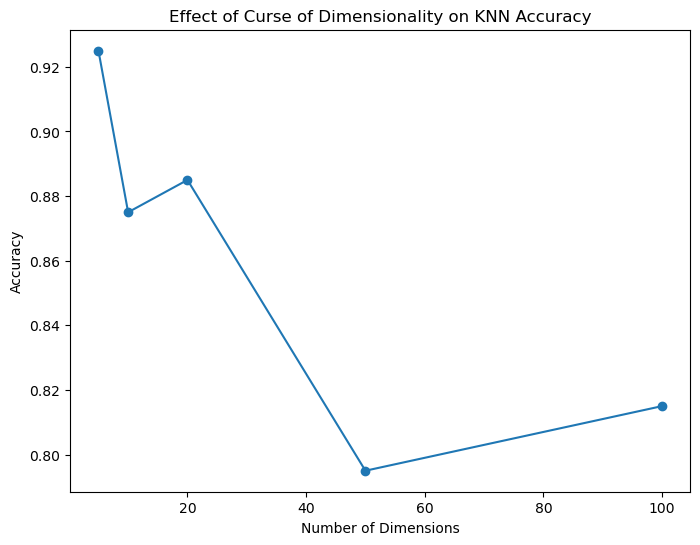

In [18]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Function to generate random high-dimensional data
def generate_data(num_samples, num_features):
    X, y = make_classification(n_samples=num_samples, n_features=num_features, random_state=4400)
    return X, y

# Varying number of dimensions
num_dimensions = [5, 10, 20, 50, 100]
accuracy_scores = []

for num_dim in num_dimensions:
    # Generate high-dimensional data
    X, y = generate_data(1000, num_dim)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=42)

    # Fit KNN model
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    # Evaluate accuracy on the test set
    accuracy = knn_model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(num_dimensions, accuracy_scores, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.title('Effect of Curse of Dimensionality on KNN Accuracy')
plt.show()


#### Example 4: Regression: diabetes dataset

In [32]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, 
                                                    test_size=0.2, random_state=4400)

# Perform data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21), 
               'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_reg = KNeighborsRegressor()
reg_grid = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
reg_grid.fit(X_train_scaled, y_train)

# Get the best parameter and best score from the grid search
best_params = reg_grid.best_params_
print(best_params)

# Fit KNN model with the best parameter
knn_best = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'],
                                metric=best_params['metric'])
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test_scaled)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print(mse)



{'metric': 'euclidean', 'n_neighbors': 15}
2760.0536329588017
